In [1]:
input='/home/sturny/stageLGM/GEO/benchmarks/data/output/resultats_R'
output='/home/sturny/stageLGM/GEO/benchmarks/data/output/comparaison'
input_py='/home/sturny/stageLGM/GEO/benchmarks/data/output/deseq2'

In [ ]:
#enlever les " qui sont mis dans r
import pandas as pd
import os

def nettoyer(input, output):
    a=pd.read_csv(input, quotechar='"')
    a.to_csv(output, index=False, quoting=0)

nettoyer(input=os.path.join(input,'periphery_centre_R.csv'),
         output=os.path.join(output,'PvsC_R.csv')
         )
nettoyer(os.path.join(input,'periphery_RPE_R.csv'),os.path.join(output,'PvsR_R.csv'))
nettoyer(os.path.join(input,'RPE_centre_R.csv'),os.path.join(output,'RvsC_R.csv'))

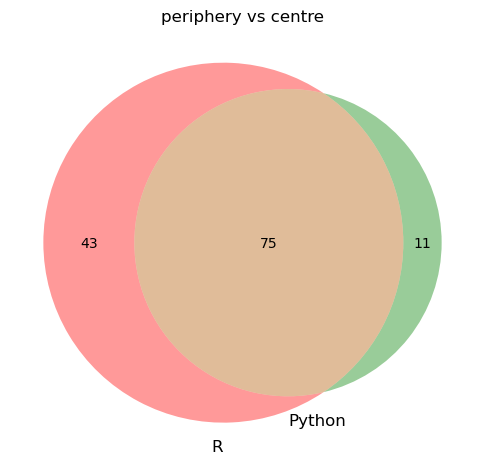

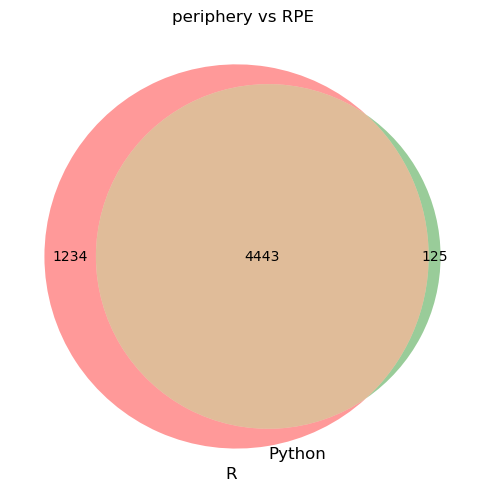

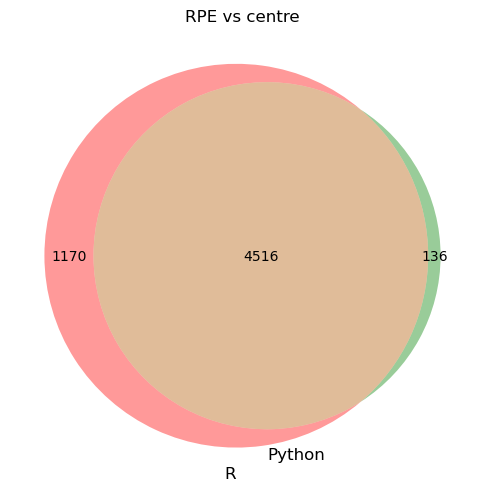

In [20]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

def read_genes(filename):
    genes = set()
    with open(filename, 'r') as f:
        next(f)  
        for line in f:
            gene = line.strip().split(',')[0]
            genes.add(gene)
    return genes

def diag_venn(r, python, titre):
    plt.figure(figsize=(6, 6))
    venn2([r, python], set_labels=('R', 'Python'))
    plt.title(titre)
    plt.show()

#PC
pc_r=read_genes(os.path.join(output,"PvsC_R.csv"))
pc_py=read_genes(os.path.join(input_py,'sigsPC_results.csv'))
diag_venn(pc_r, pc_py, titre='periphery vs centre' )


#PR
pr_r=read_genes(os.path.join(output,"PvsR_R.csv"))
pr_py=read_genes(os.path.join(input_py,'sigsPR_results.csv'))
diag_venn(pr_r, pr_py, titre='periphery vs RPE' )

 #RC
rc_r=read_genes(os.path.join(output,"RvsC_R.csv"))
rc_py=read_genes(os.path.join(input_py,'sigsRC_results.csv'))
diag_venn(rc_r, rc_py, titre='RPE vs centre' )



#ecrire fichier les genes propre a chacun 
def write_unique_r(input_file,genes_juste_r, output_file_r):
    with open(input_file, 'r') as i, open(output_file_r, 'w') as o:
        header = i.readline()
        o.write(header) 
        for line in i:
            gene = line.strip().split(',')[0]
            if gene in genes_juste_r:
                o.write(line)
def write_unique_py(input_file,genes_juste_py, output_file_py):
    with open(input_file, 'r') as i, open(output_file_py, 'w') as o:
        header = i.readline()
        o.write(header) 
        for line in i:
            gene = line.strip().split(',')[0]
            if gene in genes_juste_py:
                o.write(line)



#pc
write_unique_r(os.path.join(output,"PvsC_R.csv"),pc_r-pc_py,os.path.join(output,"pc_juste_r.csv"))
write_unique_py(os.path.join(input_py,"sigsPC_results.csv"),pc_py-pc_r,os.path.join(output,"pc_juste_py.csv"))

#pr
write_unique_r(os.path.join(output,"PvsR_R.csv"),pr_r-pr_py,os.path.join(output,"pr_juste_r.csv"))
write_unique_py(os.path.join(input_py,"sigsPR_results.csv"),pr_py-pr_r,os.path.join(output,"pr_juste_py.csv"))

#rc
write_unique_r(os.path.join(output,"RvsC_R.csv"),rc_r-rc_py,os.path.join(output,"rc_juste_r.csv"))
write_unique_py(os.path.join(input_py,"sigsRC_results.csv"),rc_py-rc_r,os.path.join(output,"rc_juste_py.csv"))




In [23]:
#stats des fichiers juste r ou juste python 

def compter(fichier):
    count_sup_0 = 0 
    count_inf_0 = 0
    with open(fichier, "r") as f:
        for ligne in f:
            if ligne.strip() == "":
                continue
            colonnes = ligne.strip().split(",")  
            try:
                valeur = float(colonnes[2])  
                if valeur > 0:
                    count_sup_0 += 1
                elif valeur < 0:
                    count_inf_0 += 1
            except:
                continue
    return count_sup_0, count_inf_0


compter(os.path.join(output,"rc_juste_r.csv"))



(327, 843)

In [ ]:
##### nettoyer fichier r avant comparer les wgcna
import csv

# Nom du fichier à traiter
filename = "/home/sturny/stageLGM/projet1/GEO/benchmarks/comparaison/wgcna/genes_orange_R.csv"

with open(filename, newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    data = [row[1] for row in reader]  
with open(filename, 'w', newline='', encoding='utf-8') as f:
    for item in data:
        f.write(item + "\n")


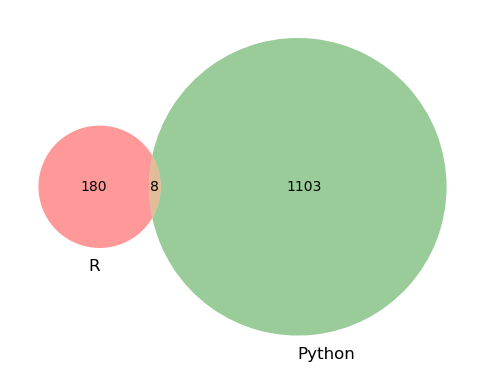

In [4]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

def read_genes(filename):
    genes = set()
    with open(filename, 'r') as f:
        next(f)  
        for line in f:
            gene = line  
            genes.add(gene)
    return genes

genes_r = read_genes('/home/sturny/stageLGM/projet1/GEO/benchmarks/comparaison/wgcna/genes_orange_R.csv')
genes_py = read_genes('/home/sturny/stageLGM/projet1/GEO/benchmarks/comparaison/wgcna/genes_blanchedalmond.csv')

plt.figure(figsize=(6, 6))
venn2([genes_r, genes_py], set_labels=('R', 'Python'))
plt.show()